# Waffle Charts

By **Franklin Oliveira**

-----
This notebook contains all code written to make the Waffle Charts of `poliquetas` collection in file: <font color='blue'>'IBUFRJ27.07.2020 - visualização.xlsx'</font>.

## Basic imports

In [1]:
import datetime
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt

from collections import defaultdict

# this package does most of the heavy work of constructing the Waffle Charts
# docs: https://pywaffle.readthedocs.io/en/latest/examples/block_shape_distance_location_and_direction.html
from pywaffle import Waffle 

alt.renderers.enable('default')

RendererRegistry.enable('default')

## Importing data...

In [2]:
NewTable = pd.read_csv('./data/merged_db.csv', sep=';', encoding='utf-8-sig')

<br>

<font size=5>**Color Palette**</font>

<!-- 
<div class='row' style='padding-top:20px;'>
    <div class='col-md-6'>
        <img src="./src/img1.jpg" width='400px'>
    </div>
    <div class='col-md-6'>
        <img src="./src/img2.jpg" width='400px'>
    </div>
</div>

<br>

**Colors:** 

<ul>
    <li style='color:#41A681'><b> #41A681 </b># verde</li>
    <li style='color:#7ACAAB'><b> #7ACAAB </b># verde claro</li>
    <li style='color:#78a1a1'><b> #78a1a1 </b># azul</li>
    <li style='color:#8ABFB0'><b> #8ABFB0 </b># azul claro</li>
    <li style='color:#FFB27C'><b> #FFB27C </b># cor de pele clara</li>
    <li style='color:#F29877'><b> #F29877 </b># cor de pele</li>
    <li style='color:#ed845e'><b> #ed845e </b># laranja claro1</li>
    <li style='color:#D96236'><b> #D96236 </b># laranja claro2</li>
    <li style='color:#D95323'><b> #D95323 </b># laranja 1</li>
    <li style='color:#D94B18'><b> #D94B18 </b># laranja 2</li>
    <li style='color:#D9C2AD'><b> #D9C2AD </b># bege</li>
    <li style='color:#A66C4B'><b> #A66C4B </b># marrom claro</li>
    <li style='color:#86471B'><b> #86471B </b># marrom1</li>
    <li style='color:#732C02'><b> #732C02 </b># marrom2</li>
    <li style='color:#592202'><b> #592202 </b># marrom escuro1</li>
    <li style='color:#3D1806'><b> #3D1806 </b># marrom escuro2</li>
    <li style='color:#0D0D0D'><b> #0D0D0D </b># preto</li>
</ul>

 -->

In [3]:
# importing customized color palettes
from src.MNViz_colors import *

In [4]:
# # determinando cores de acordo com a planilha (2020.10.01 - IB e MN - Cores visualização.xlsx)
# ordens = NewTable['order'].unique()

# # o agrupamento é feito por famílias (ordem daquelas famílias deve assumir certa cor)
# cores_ordem = {
#     'Spionida':'#41A681',   # verde
#     'Sabellida':'#7ACAAB',  # verde claro
#     'Canalipalpata':'#78a1a1',  # azul
#     'Amphinomida':'#8ABFB0',  # azul claro
#     'Eunicida':'#A66C4B', # marrom claro
#     'Phyllodocida':'#732C02', # marrom2
#     'Terebellida':'#ed845e', # laranja claro1
#     'Scolecida':'#D94B18', # laranja 2
#     np.NAN:'#0D0D0D',  # preto
    
#     # ordens não citadas na planilha:
#     'Sipuncula':'#D9C2AD', # bege
#     'Crassiclitellata':'#FFB27C', # cor de pele clara
#     'Aspidosiphonida':'#F29877',  # cor de pele
    
# }

## Waffle Charts

----

### 1- Orders

In [5]:
def calcPercentages(df, col='order', discard_col= 'index'):
    
    if discard_col == 'index':
        temp = df.reset_index()
    else:
        temp = df
    
    percent = temp.groupby(col).count()[discard_col].reset_index().rename(
                                                                    columns={discard_col:'counts'})
    percent['percent'] = percent['counts'] / percent['counts'].sum()
    percent['percent'] = percent['percent'] * 100
    
    return percent

In [6]:
percent = calcPercentages(NewTable)
percent.head()

,order,counts,percent
0,Amphinomida,464,6.855792
1,Eunicida,1489,22.000591
2,Order_incertae_sedis,62,0.916076
3,Phyllodocida,2486,36.731678
4,Sabellida,761,11.244090


In [7]:
# adicionando coluna com as cores por ordem
percent['cores'] = percent['order'].apply(lambda x: cores_ordem[x])

In [8]:
percent.sort_values('percent', inplace=True)

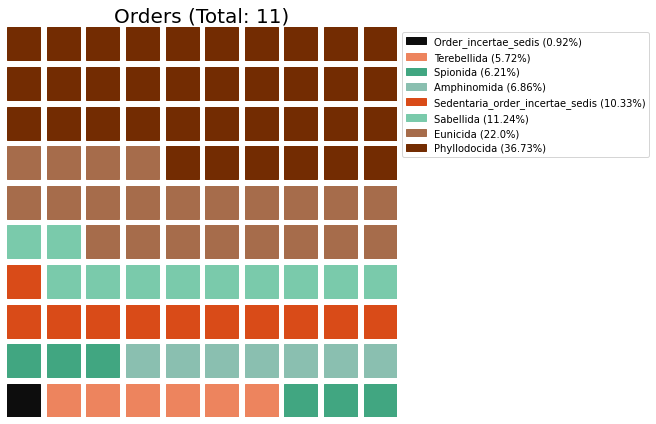

In [9]:
# standard figure
fig1 = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
#     columns=10, 
    tight_layout=True,
    rounding_rule='floor',
    values=[i for i in percent['percent']],
    colors=list(percent['cores']),
    title={
        'label': f'Orders (Total: {11})', 
        'loc': 'center',
        'fontdict': {
            'fontsize':20
        }
    },
    labels=["{0} ({1}%)".format(k, round(v, 2)) for k, v in zip(percent['order'], percent['percent'])],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icon_size=18,
    vertical= True,
    icon_legend=True,
#     block_arranging_style='snake',  # new-line
#     legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    figsize=(10, 6)  # figsize is a parameter of matplotlib.pyplot.figure
)

# plt.savefig('./graphs/waffles/orders.svg')
# plt.savefig('./graphs/waffles/orders.png')

plt.show()

<br>

<font color='red' size='5'>**p.s.:** In the chart above, really small values are still drawn. We'll try to adress this problem in the next chart</font>

<br>

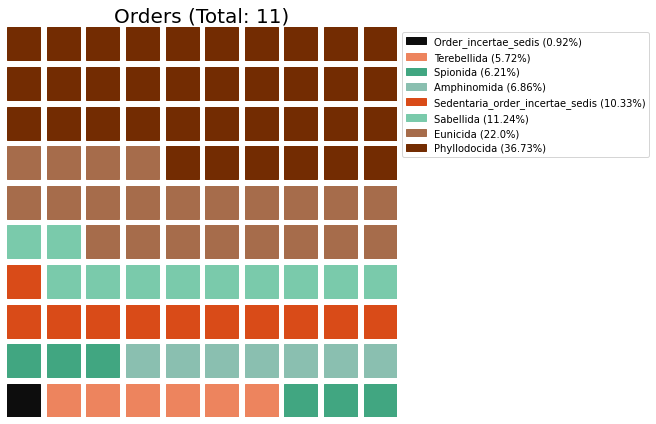

In [10]:
# standard figure
fig1 = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
#     columns=10, 
    tight_layout=True,
    rounding_rule='floor',
    values=[round(i,1) for i in percent['percent'] if round(i) > 0],
    colors=[c for c,v in zip(percent['cores'], percent['percent']) if round(v) > 0],
    title={
        'label': f'Orders (Total: {11})', 
        'loc': 'center',
        'fontdict': {
            'fontsize':20
        }
    },
    labels=["{0} ({1}%)".format(k, round(v, 2)) for k, v in zip(percent['order'], percent['percent']) if round(v) > 0],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icon_size=18,
    vertical= True,
    icon_legend=True,
#     block_arranging_style='snake',  # new-line
#     legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    figsize=(10, 6)  # figsize is a parameter of matplotlib.pyplot.figure
)

plt.savefig('./graphs/waffles/order1.svg')
plt.savefig('./graphs/waffles/order1.png')

plt.show()

<br>

-----

### 2- Orders per family

In [11]:
percent = calcPercentages(NewTable[NewTable['family'] == 'Eunicidae'])
percent.sort_values('counts', inplace=True)

In [12]:
# adicionando coluna com as cores por ordem
percent['cores'] = percent['order'].apply(lambda x:cores_ordem[x])

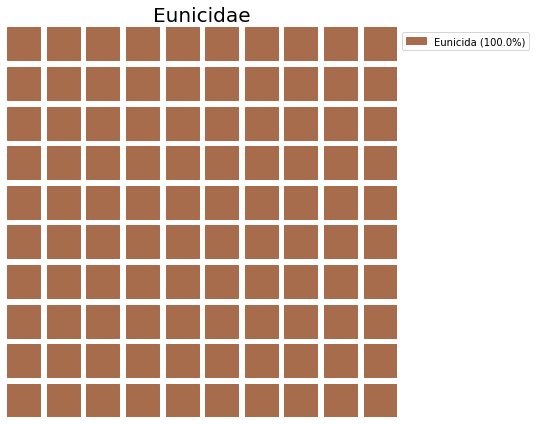

In [13]:
# standard figure
fig1 = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
#     columns=10, 
#     rounding_rule='floor',
    values=list(percent['percent']),
    colors=list(percent['cores']),
    title={
        'label': 'Eunicidae', 
        'loc': 'center',
        'fontdict': {
            'fontsize':20
        }
    },
    labels=["{0} ({1}%)".format(k, round(v, 2)) for k, v in zip(percent['order'], percent['percent'])],
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icon_size=18,
    vertical= True,
    icon_legend=True,
#     legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    figsize=(10, 6)  # figsize is a parameter of matplotlib.pyplot.figure
)

# plt.savefig('./graphs/waffles/ordens.svg')
# plt.savefig('./graphs/waffles/ordens.png')

plt.show()

In [14]:
family_counts = NewTable['family'].value_counts().reset_index()
family_counts.columns = ['family', 'count']

NewTable.sort_values('order', inplace=True)

In [15]:
d = defaultdict()

index=0
for family in NewTable['family'].unique():
    # filtrando a base e calculando percentuais
    temp = calcPercentages(NewTable[NewTable['family']==family])
    temp.sort_values('percent', inplace=True)
    
    # criando coluna de cores
    temp['cores'] = temp['order'].apply(lambda x:cores_ordem[x])
    
    # contagem
    count = family_counts[family_counts['family'] == family]['count'].values[0] 
       
    index +=1
    
    #dict for chart
    d[(6,10,index)]= { 
        'rows':10, 
    #     columns=10, 
    #     rounding_rule='floor',
        'values':list(temp['percent']),
        'colors':list(temp['cores']),
        # p.s.: thousands separator is: ,
        'title':{
            'label': f'Family: {family}\nTotal of registers: {count}'.replace(',','.'),
            'loc': 'left', 'fontsize':18},
        'icon_legend':True,
    }
        
d = dict(d)
# d

#### Making `waffle charts`

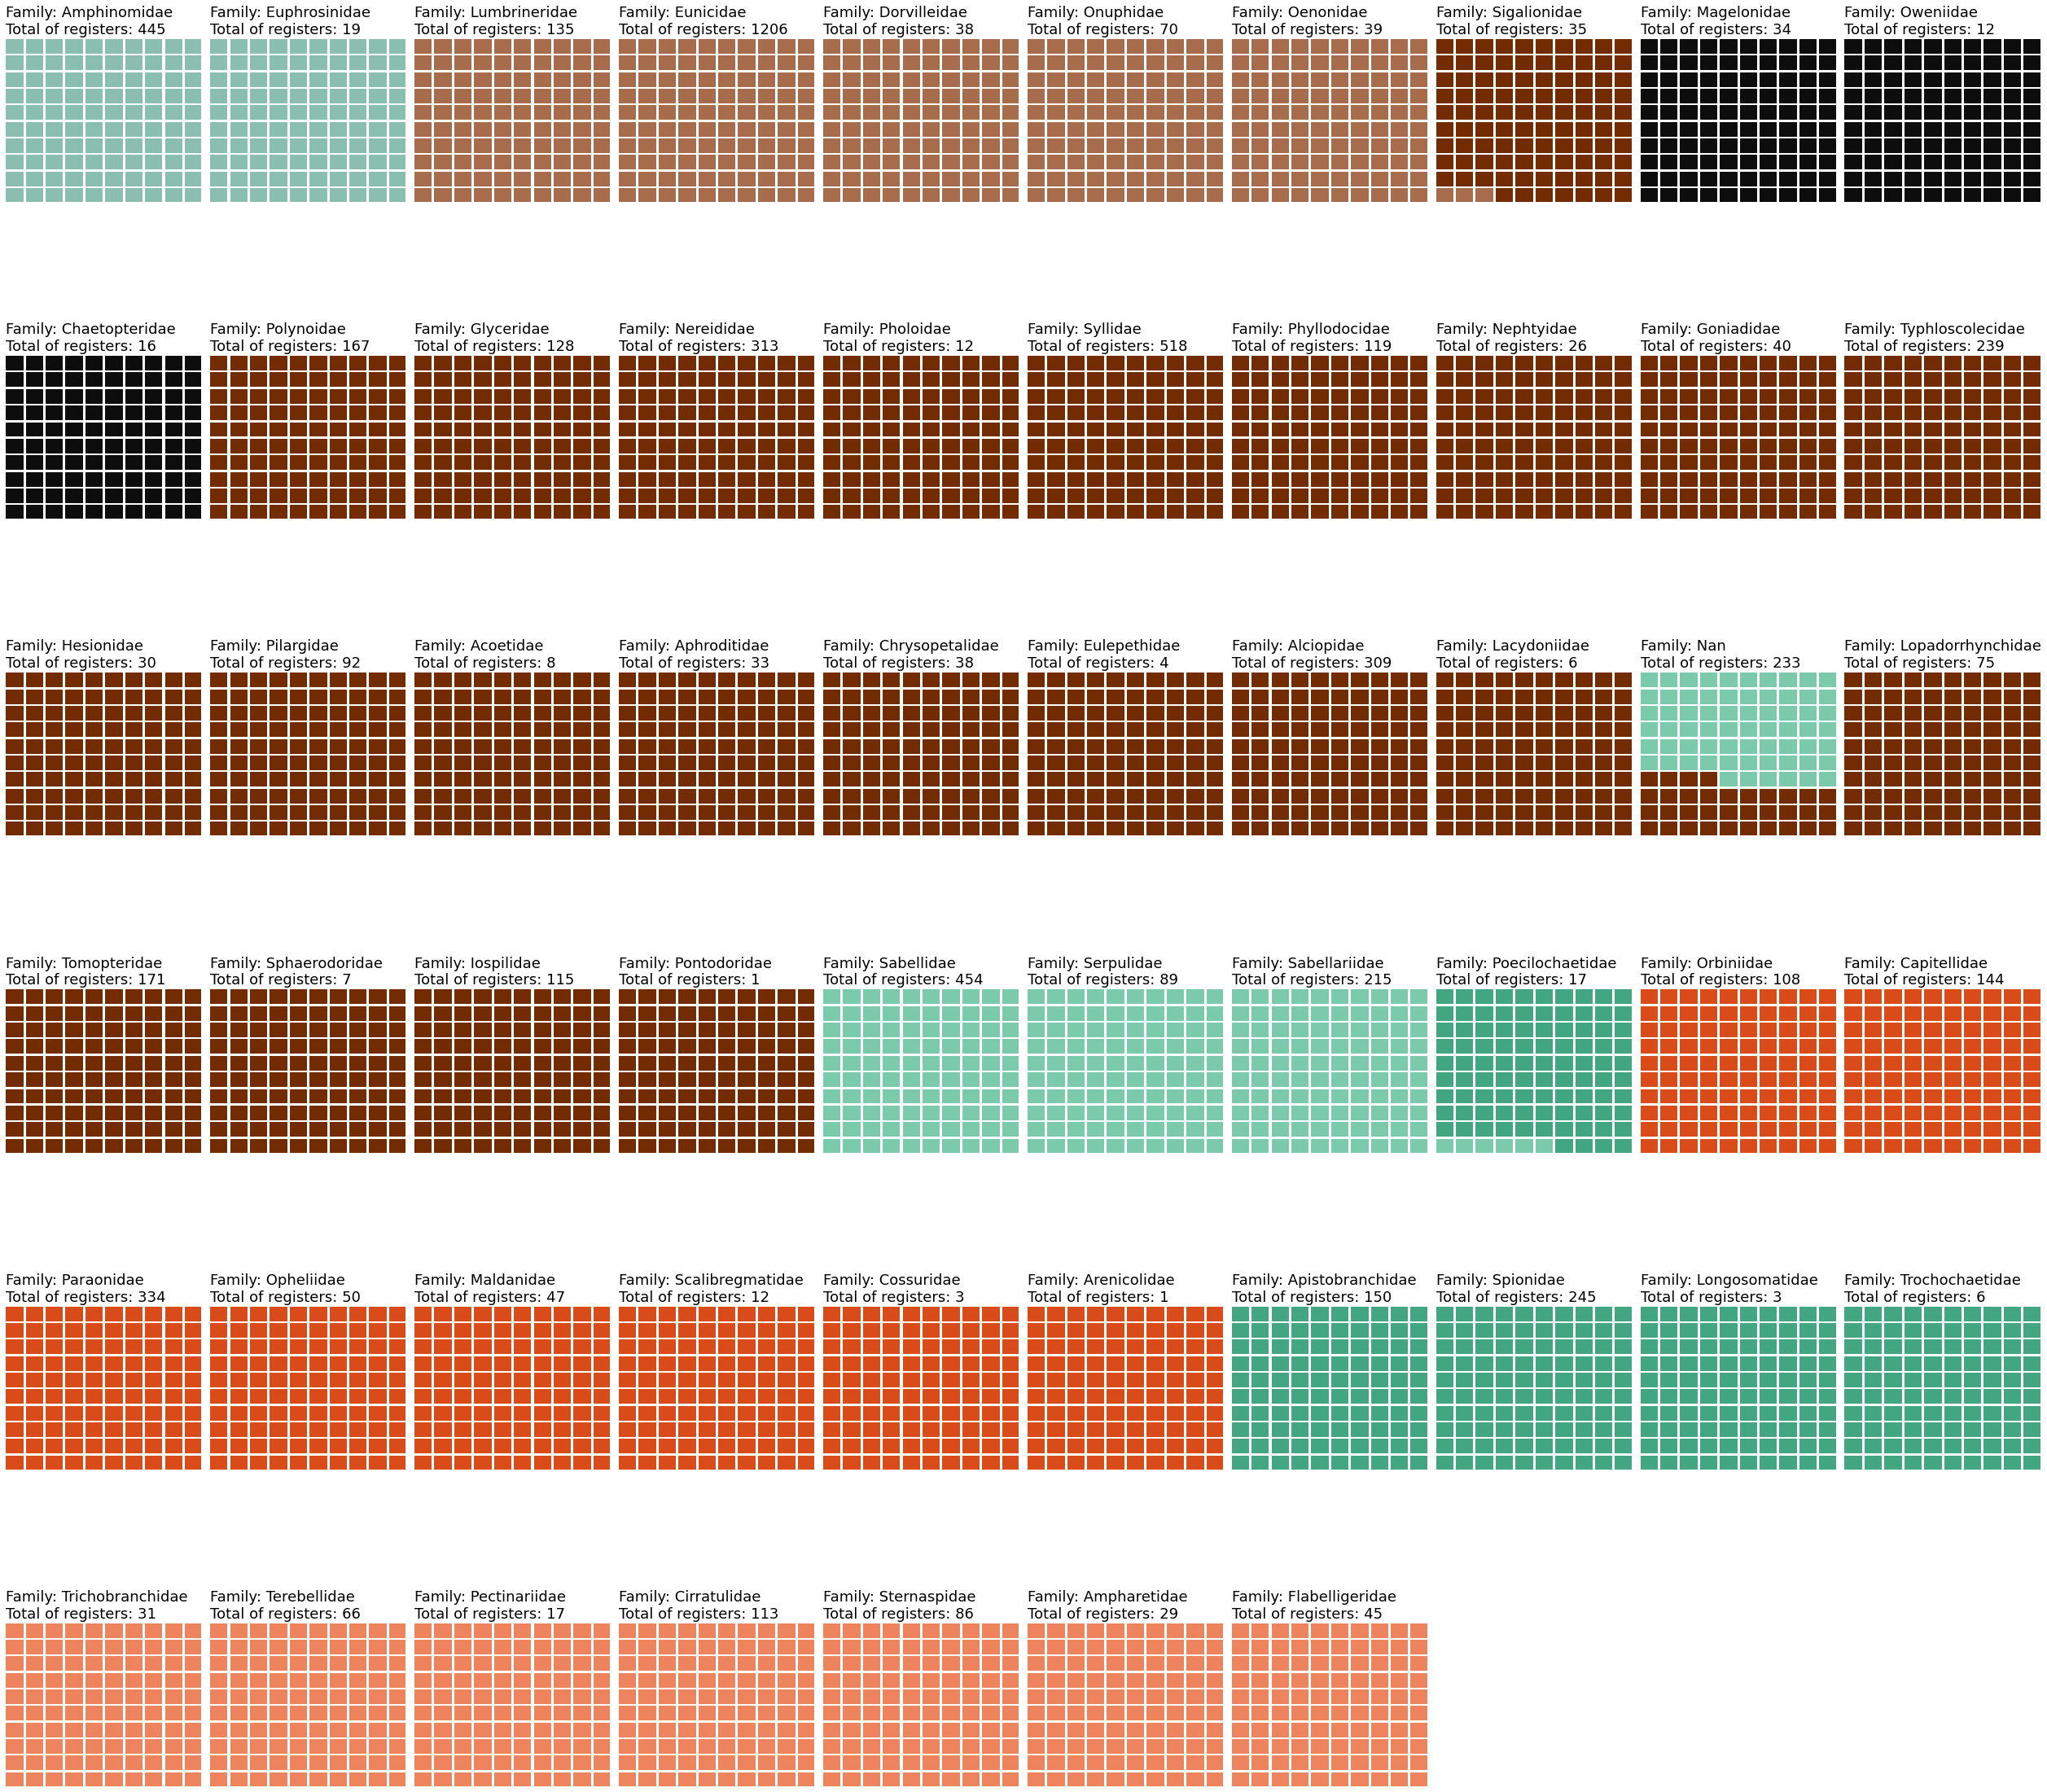

In [16]:
teste = plt.figure(
    FigureClass= Waffle,
    plots= d,
    rows=10, 
#     columns=10, 
    vertical=True, 
    block_aspect_ratio=1.2,
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    figsize=(35, 35)  # figsize is a parameter of matplotlib.pyplot.figure
    
)

# saving charts
plt.savefig('./graphs/waffles/families.svg')
plt.savefig('./graphs/waffles/families.png')

<br>

**The end!**

-----